# Latent Variable Models and Variational Bayes


### Preliminaries

- Goal 
  - Introduction to latent variable models and variational inference by Free energy minimization   
- Materials
  - Mandatory
    - These lecture notes
    - Ariel Caticha (2010), [Entropic Inference](https://arxiv.org/abs/1011.0723)
      - tutorial on entropic inference, which is a generalization to Bayes rule and provides a foundation for variational inference.
  - Optional 
    - Bishop (2016), pp. 461-486 (sections 10.1, 10.2 and 10.3) 
  - references <a id='references'></a>
    - Blei et al. (2017), [Variational Inference: A Review for Statisticians](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773) 
    - Lanczos (1961), [The variational principles of mechanics](https://www.amazon.com/Variational-Principles-Mechanics-Dover-Physics/dp/0486650677)
    

### Illustrative Example <a id='illustrative-example'></a>

- You're now asked to build a density model for a data set ([Old Faithful](https://en.wikipedia.org/wiki/Old_Faithful), Bishop pg. 681) that clearly is not distributed as a single Gaussian:

<img src="./figures/fig-Bishop-A5-Old-Faithfull.png" width="350">

###  Unobserved Classes

Consider again a set of observed data $D=\{x_1,\dotsc,x_N\}$

- This time we suspect that there are _unobserved_ class labels that would help explain (or predict) the data, e.g.,
  - the observed data are the color of living things; the unobserved classes are animals and plants.
  - observed are wheel sizes; unobserved categories are trucks and personal cars.
  - observed is an audio signal; unobserved classes include speech, music, traffic noise, etc.
 

   
- Classification problems with unobserved classes are called **Clustering** problems. The learning algorithm needs to **discover the classes from the observed data**.

### The Gaussian Mixture Model

- The spread of the data in the illustrative example looks like it could be modeled by two Gaussians. Let's develop a model for this data set. 

- Let $D=\{x_n\}$ be a set of observations. We associate a one-hot coded hidden class label $z_n$ with each observation:

$$\begin{equation*}
z_{nk} = \begin{cases} 1 & \text{if } x_n \in \mathcal{C}_k \text{ (the k-th class)}\\
                       0 & \text{otherwise} \end{cases}
\end{equation*}$$

- We consider the same model as for the generative classification model:
$$\begin{align*}
p(x_n | z_{nk}=1) &= \mathcal{N}\left( x_n | \mu_k, \Sigma_k\right)\\
p(z_{nk}=1) &= \pi_k
\end{align*}$$
which can be summarized with the selection variables $z_{nk}$ as
$$\begin{align*}
p(x_n,z_n) &= p(x_n | z_n) p(z_n) = \prod_{k=1}^K (\underbrace{\pi_k \cdot \mathcal{N}\left( x_n | \mu_k, \Sigma_k\right) }_{p(x_n,z_{nk}=1)})^{z_{nk}} 
\end{align*}$$
  - *Again*, this is the same model as we defined for the generative classification model (but now with unobserved classes). 
  - This model (with unobserved class labels) is known as a **Gaussian Mixture Model** (GMM).

- The marginal distribution for an _observed_ data point $x_n$ is now given by (Exercise)
$$\begin{align*}{}
p(x_n) &= \sum_{z_n} p(x_n,z_n)  \\
  &= \sum_{k=1}^K \pi_k \cdot \mathcal{N}\left( x_n | \mu_k, \Sigma_k \right) \tag{B-9.12}
\end{align*}$$
  - (Eq. B-9.12 reveals the link to the name Gaussian *mixture model*).

###  GMM is a very flexible model

- GMMs are very popular models. They have decent computational properties and are **universal approximators of densities** (as long as there are enough Gaussians of course)

<img src="./figures/fig-ZoubinG-GMM-universal-approximation.png" width="600">

- (In the above figure, the Gaussian components are shown in <font color=red>red</font> and the pdf of the mixture models in <font color=blue>blue</font>).

### Latent Variable Models

- The GMM contains both _observed_ variables $\{x_n\}$, (unobserved) _parameters_ $\theta= \{\pi_k,\mu_k, \Sigma_k\}$ _and_ unobserved (synonym: latent, hidden) variables $\{z_n\}$.

- From a Bayesian viewpoint, both latent variables $\{z_{nk}\}$ and parameters $\theta$ are just unobserved variables for which we can set a prior and compute a posterior by Bayes rule. 

- As a matter of naming convention, the number of _latent variables_ increase with the number of observations, while the number of _model parameters_ does not change with the size of the data set.

- Latent variables such as $\{z_{nk}\}$ can be useful to encode structure in the model. Here (in the GMM), the latent variables $\{z_{nk}\}$ encode (unobserved) class membership. 

- By adding model structure through (equations among) latent variables, we can build very complex models. Unfortunately, inference in latent variable models can also be much more complex than for fully observed models.

### Inference for GMM is Difficult


- We recall here the [log-likelihood for the categorical-Gaussian generative classification model](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Generative-Classification.ipynb)

$$
\log\, p(D|\theta) =  \sum_{n,k} y_{nk} \underbrace{ \log\mathcal{N}(x_n|\mu_k,\Sigma) }_{ \text{Gaussian} } + \underbrace{ \sum_{n,k} y_{nk} \log \pi_k }_{ \text{multinomial} } \,.
$$

- Since the class labels $y_{nk}$ were given, this expression decomposed into a set of simple updates for the Gaussian and multinomial distributions. For both distributions, we have conjugate priors, so inference is easily solved. 

- However, for the Gaussian mixture model (same log-likelihood function with $z_{nk}$ replacing $y_{nk}$), the class labels $\{z_{nk}\}$ are _unobserved_ and need to estimated alongside with the parameters.

- There is no conjugate prior for the GMM likelihood function $p(\{x_n\}\,|\,\underbrace{\{z_{nk}\},\{\mu_k,\Sigma_k,\pi_k\}}_{\text{latent variables}})$.

- In this lesson, we introduce an approximate Bayesian inference method known as **Variational Bayes** (VB) (also known as **Variational Inference**) that can be used for Bayesian inference in models with latent variables. Later in this lesson, we will use VB to do inference in the GMM.   

- As a motivation for variational inference, we first discuss inference by the **Method of Maximum Relative Entropy**, [(Caticha, 2010)](https://arxiv.org/abs/1011.0723). 

### Inference When Information is in the Form of Constraints 

- In the [probability theory lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Probability-Theory-Review.ipynb#Bayes-rule), we recognized Bayes rule as the fundamental rule for learning from data.

- We will now generalize this notion and consider learning as a process that updates a prior into a posterior distribution whenever new information becomes available.

- In this context, *new information* is not necessarily a new observation, but could (for instance) also relate to *constraints* on the posterior distribution.

- For example, consider a model $p(x_n,\theta) = p(x_n|\theta)p(\theta)$. At this point, our beliefs about $\theta$ are represented by $p(\theta)$. We might be interested in obtaining rational posterior beliefs $q(\theta)$ in consideration of the following constraints:
  1. Observations: two new data points $x_1=5$ and $x_2=3$.
  2. Constraint: we only consider the Gamma distribution for $q(\theta) = \mathrm{Gam}(\theta|\alpha,\beta)$.
  3. Constraint: the first moment of the posterior is given by $\int \theta q(\theta) \mathrm{d}\theta = 3$.

- Note that this is not "just" applying Bayes rule, which would not be able to handle the constraints.

- Note also that observations _can_ be rephrased as constraints on the posterior, e.g., observation $x_1=5$ can be phrased as a constraint $q(x_1)=\delta(x_1-5)$.
  - $\Rightarrow$ Updating a prior to a posterior on the basis of constraints on the posterior is more general than updating based on observations alone.

- [Caticha (2010)](https://arxiv.org/abs/1011.0723) developed the **method of maximum (relative) entropy** for rational updating of priors to posteriors when faced with new information in the form of constraints.

### The Method of Maximum Relative Entropy

- Consider prior beliefs $p(x)$ about $x$. New information in the form of constraints is obtained and we are interested in the "best update" to a posterior $q(x)$.

- In order to define what "best update" means, we assume a ranking function $S[q,p]$ that generates a preference score for each candidate posterior $q$ for a given $p$. The best update from $p$ to $q$ is identified as $q^* = \arg\max_q S[q,p]$.   

- Similarly to [Cox' method to deriving probability theory](https://en.wikipedia.org/wiki/Cox%27s_theorem), Caticha introduced the following mild criteria based on a rational principle (the **principle of minimal updating**, see [Caticha 2010](https://arxiv.org/abs/1011.0723)) that the ranking function needs to adhere to: 
  1. *Locality*: local information has local effects.
  2. *Coordinate invariance*: the system of coordinates carries no information. 
  3. *Independence*: When systems are known to be independent, it should not matter whether they are treated separately or jointly. 
  

- These three criteria **uniquely identify the Relative Entropy** as the proper ranking function: 
$$\begin{align*}
S[q,p] = - \int q(x) \log \frac{q(x)}{p(x)}
\end{align*}$$

- $\Rightarrow$ When information is supplied in the form of constaints on the posterior, we *should* select the posterior that maximizes the Relative Entropy. This is the **Method of Maximum (Relative) Entropy** (MRE). 

### Some notes on the MRE method

- Note that the Relative Entropy is technically a *functional*, i.e., a function of function(s). 

- **Bayes rule is (of course!) a special case of the method of maximum relative entropy**. [Proof at pg.6 of Caticha (2010)](https://arxiv.org/abs/1011.0723).

- Note the relation of the Maximum Relative Entropy method to Probability Theory, which describes how to _represent_ beliefs about events and how to _calculate_ beliefs about joint and conditional events. In contrast, the MRE method describes how to _update_ beliefs when new information becomes available. PT and the MRE method are both needed to describe the theory of optimal information processing. 

- In principle, entropies can always be considered as a relative score against a reference distribution. For instance, the score $-\sum_{x_i} q(x_i) \log q(x_i)$ can be interpreted as a score against the uniform distribution, i.e., $-\sum_{x_i} q(x_i) \log q(x_i) \propto -\sum_{x_i} q(x_i) \log \frac{q(x_i)}{\mathrm{Uniform(x_i)}}$. Therefore, the "method of maximum relative entropy" is often simply known as the "method of maximum entropy". 

- The negative relative entropy is known as the **Kullback-Leibler divergence**:
$$
\mathrm{KL}(q,p) \triangleq \sum_x q(x) \log \frac{q(x)}{p(x)} \tag{B-1.113}
$$
  - The KL divergence can be interpreted as a "distance" between two probability distributions.
  - Note that the KL divergence is an asymmetric "distance measure", i.e. in general $\mathrm{KL}(q,p) \neq \mathrm{KL}(p,q)$.

- The [Gibbs inequality](https://en.wikipedia.org/wiki/Gibbs%27_inequality) ([proof](https://en.wikipedia.org/wiki/Gibbs%27_inequality#Proof)), is a famous theorem in information theory that states that 
$$\mathrm{KL}(q,p) \geq 0 $$
with equality only iff $p=q$.

- In this class, we prefer to discuss inference in terms of minimizing KL divergence rather than maximizing relative entropy, but note that these two concepts are equivalent. 

### Example KL divergence for Gaussians

<img src="./figures/KL-Gauss-Example.png" width="600">

<SPAN STYLE="font-size:30%'">source: By <a href="https://en.wikipedia.org/wiki/User:Mundhenk" class="extiw" title="w:User:Mundhenk">Mundhenk</a> at <a href="https://en.wikipedia.org/wiki/" class="extiw" title="w:">English Wikipedia</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=75315685">Link</a></span>



### The Free Energy Functional and Variational Bayes

- Let's get back to the issue of doing inference for models with latent variables (such as the GMM). 

- Consider a generative model specified by $$p(x,z) = p(x|z)p(z)\,,$$ where $x$ and $z$ represent the observed and unobserved variables, respectively.

- Assume that $x$ has been observed and we are interested in performing Bayesian inference, i.e., we want to compute the posterior $p(z|x)$ for the latent variables and the evidence $p(x)$.

- According to the MRE method, we want to select a posterior $q(z)$ that, subject to any constraints, minimizes the KL divergence between $q(z)$ and the "perfect" Bayesian posterior $p(z|x)$:
$$
\mathrm{KL}[q,p] = \sum_z q(z) \log \frac{q(z)}{p(z|x)}
$$

- If we scale the KL divergence by a constant (i.e., constant w.r.t. $z$) the ranking of candidate posteriors $q(z)$ is not affected. Hence, the posterior that we want also minimizes the so-called (variational) **Free Energy** (FE) functional 
$$
\mathrm{F}[q] = \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x)}}_{\text{KL divergence}\geq 0} - \underbrace{\log p(x)}_{\text{(Bayesian) log-evidence}} \tag{B-10.2}
$$
  - For brevity, we write $F[q]$ rather than $F[q,p]$ since we are interested in minimizing $F$ w.r.t. $q$.
  - (As an aside), note that Bishop introduces in Eq. B-10.2 an _Evidence Lower BOund_ (in modern literature abbreviated as ELBO) $\mathcal{L}(z)$ that equals the _negative_ FE. We prefer to discuss variational inference in terms of a free energy (but it is the same story as he discusses with the ELBO).  
  

- The log-evidence term for the FE does not depend on $q$. Hence, the global minimum $$q^* \triangleq \arg\max_q F[q]$$ is obtained for $q^*(z) = p(z|x)$, which is the Bayesian posterior.

- Furthermore, the minimal free energy $F^* \triangleq F[q^*] = -\log p(x)$ equals minus-log-evidence.  

- $\Rightarrow$ <font color=red>It follows that Bayesian inference (computation of posterior and evidence) can be executed by FE minimization.</font>

- Executing inference by minimizing the FE functional is called **Variational Bayes** (VB) or variational inference. Note that VB transforms an inference problem (that involves integration) to an optimization problem! Generally optimization problems are easier to solve than integration problems. 

###  Approximate Inference by Free Energy Minimization 

  - The FE as specified above depends on the posterior $p(z|x)$ and evidence $p(x)$, both of which are not accessible since they are the objectives of Bayesian inference. Fortunately, we can rewrite the FE in computable terms. 
  

- <a id='fe-decompositions'></a> Making use of $p(x,z) = p(z|x)p(x) = p(x|z)p(z)$, the FE functional can be rewritten as (Exercise)

$$\begin{align*}
\mathrm{F}[q,p] &= \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x)}}_{\text{KL divergence}\geq 0} - \underbrace{\log p(x)}_{\text{log-evidence}} \tag{DE}\\
&= \underbrace{-\sum_z q(z) \log p(x,z)}_{\text{energy}} - \underbrace{\sum_z q(z) \log \frac{1}{q(z)}}_{\text{entropy}} \tag{EE} \\
&= \underbrace{\sum_z q(z)\log\frac{q(z)}{p(z)}}_{\text{complexity}} - \underbrace{\sum_z q(z) \log p(x|z)}_{\text{accuracy}}  \tag{CA}
\end{align*}$$
   - These decompositions are very insightful (wil revisit them later) and we will label them respectively as _divergence-evidence_ (DE), _energy-entropy_ (EE), and _complexity-accuracy_ (CA) decompositions. 

- The CA decomposition makes use of $q(z)$, the prior $p(z)$ and likelihood $p(x|z)$, all of which are selected by the engineer, so the FE can be evaluated with this decomposition!

- Often, we are unable to fully minimize the FE (to the global minimum), but rather get stuck in a local minimum. 

- In that case, (by the DE composition and Gibbs inequality) the FE is an _upperbound_ on $-\log p(x)$, the (negative) log-evidence.  

- Thus, FE minimization (variational Bayes) leads often to _approximate_ Bayesian inference, with approximate posterior 
$$
\hat{q}(z) \approx \arg\min_q F[q] \\
$$
and model performance is assessed by the free energy $F[\hat{q}]$.


  

###  How to Solve  the FE Minimization task? 


- Note that the FE is a _functional_ , i.e., the FE is a function ($F$) of a function ($q$). We are looking for a _function_ $q^*(z)$ that minimizes the FE. 

- The mathematics of minimizing functionals is described by _variational calculus_ , see Bishop (2016), app.D and [Lanczos (1961)](https://www.amazon.com/Variational-Principles-Mechanics-Dover-Physics/dp/0486650677). (Optional reading).

- Generally speaking, it is not possible to solve the variational FE minimization problem without some additional constraints on $q(z)$ (i.e., in addition to the data constraints).

- Note that adding constraints to the functional form of $q(z)$ is fully compliant with the MRE method (and therefore also with the FE minimization framework). 

- There are three important cases of adding functional constraints on $q(z)$ that sometimes makes inference possible:

##### 1. mean-field factorization
- We constrain the posterior to factorize into a set of _independent_ factors, i.e., 
$$
q(z) = \prod_{j=1}^m q_j(z_j)\,, \tag{B-10.5}
$$

#####  2. fixed-form parameterization
- We constrain the posterior to be part of a parameterized probability distribution, e.g., $$q(z) = \mathcal{N}\left( z | \mu, \Sigma \right)\,.$$ 
  - In this case, the functional minimization problem for $F[q]$ reduces to the minimization of a _function_ $F(\mu,\Sigma)$ w.r.t. its parameters.  
 

##### 3. the Expectation-Maximization (EM) algorithm
- We place some constraints both on the prior and posterior for $z$ (to be dicussed below) that simplifies FE minimization to maximum-likelihood estimation. 

- Next, we work out examples for the mean-field and EM constraints that makes FE minimization solvable. 

### FE Minimization by Mean-field Factorization 

- Given the mean-field constraint $q(z) = \prod_{j=1}^m q_j(z_j)$, it is possible to derive an expression for the <a id="optimal-solutions">optimal solutions</a> $q_j^*(z_j)$, for $j=1,\ldots,m$, which is given by 
$$\begin{align} 
\log q_j^*(z_j) &\propto \mathrm{E}_{q_{-j}^*}\left[ \log p(x,z) \right] \tag{B-10.9}\\
  &=\sum_{z_{-j}} q_{-j}^*(z_{-j}) \log p(x,z) \notag
\end{align}$$
where we defined $q_{-j}^*(z_{-j}) \triangleq q_1^*(z_1)q_2^*(z_2)\cdots q_{j-1}^*(z_{j-1})q_{j+1}^*(z_{j+1})\cdots q_m^*(z_m)$.

  - <font color=green>Proof (from [Blei, 2017](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773)): We first rewrite the energy-entropy decomposition of the FE as a function of $q_j(z_j)$ only: 
  $$ F[q_j] = \mathbb{E}_{q_{j}}\left[ \mathbb{E}_{q_{-j}}\left[ \log p(x,z_j,z_{-j})\right]\right] - \mathbb{E}_{q_j}\left[ \log q_j(z_j)\right] + \mathtt{const.}\,,$$
  where the constant holds all terms that do not depend on $z_j$. This expression can be written as 
  $$ F[q_j] = \sum_{z_j} q_j(z_j) \log \frac{q_j(z_j)}{\exp\left( \mathbb{E}_{q_{-j}}\left[ \log p(x,z_j,z_{-j})\right]\right)}$$
  which is a KL-divergence that is minimized by Eq. B-10.9. </font> 

  
- This is not yet a full solution to the FE minimization task since the solution $q_j^*(z_j)$ depends on expectations that involve $q_{i\neq j}^*(z_{i \neq j})$, and each of the solutions $q_{i\neq j}^*(z_{i \neq j})$ depends on an expection that involves $q_j^*(z_j)$. 

- In practice, we solve this chicken-and-egg problem by an iterative approach: we first initialize all $q_j(z_j)$ (for $j=1,\ldots,m$) to an appropriate initial distribution and then cycle through the factors in turn by solving eq.10.9 and update $q_{-j}^*(z_{-j})$ with the latest estimates. (See [Blei, 2017](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773), Algorithm 1, p864).  

### Example: FEM for the Gaussian Mixture Model

##### model specification


- We consider a Gaussian Mixture Model, specified by 
$$\begin{align*}
p(x,z|\theta) &= p(x|z,\mu,\Lambda)p(z|\pi) \\
  &= \prod_{n=1}^N \prod_{k=1}^K \pi_k^{z_{nk}}\cdot \mathcal{N}\left( x_n | \mu_k, \Lambda_k^{-1}\right)^{z_{nk}} \tag{B-10.37,38}
\end{align*}$$
with tuning parameters $\theta=\{\pi_k, \mu_k,\Lambda_k\}$.

- Let us introduce some priors for the parameters. We factorize the prior and choose conjugate distributions by
$$
p(\theta) = p(\pi,\mu,\Lambda) = p(\pi) p(\mu|\Lambda) p(\Lambda)
$$
with 
$$\begin{align*}
p(\pi) &= \mathrm{Dir}(\pi|\alpha_0) = C(\alpha_0) \prod_k \pi_k^{\alpha_0-1} \tag{B-10.39}\\
p(\mu|\Lambda) &= \prod_k \mathcal{N}\left(\mu_k | m_0, \left( \beta_0 \Lambda_k\right)^{-1} \right) \tag{B-10.40}\\
p(\Lambda) &= \prod_k \mathcal{W}\left( \Lambda_k | W_0, \nu_0 \right) \tag{B-10.40}
\end{align*}$$
where $\mathcal{W}\left( \cdot \right)$ is a [Wishart distribution](https://en.wikipedia.org/wiki/Wishart_distribution) (i.e., a multi-dimensional Gamma distribution).

- The full generative model is now specified by
$$
p(x,z,\pi,\mu,\Lambda) = p(x|z,\mu,\Lambda) p(z|\pi) p(\pi) p(\mu|\Lambda) p(\Lambda) \tag{B-10.41}
$$
with hyperparameters $\{ \alpha_0, m_0, \beta_0, W_0, \nu_0\}$.

##### inference

- Assume that we have observed $D = \left\{x_1, x_2, \ldots, x_N\right\}$ and are interested to infer the posterior distribution for the tuning parameters: 
$$
p(\theta|D) = p(\pi,\mu,\Lambda|D)
$$

- The (perfect) Bayesian solution is 
$$
p(\theta|D) = \frac{p(x=D,\theta)}{p(x=D)} = \frac{\sum_z p(x=D,z,\pi,\mu,\Lambda)}{\sum_z \sum_{\pi} \iint p(x=D,z,\pi,\mu,\Lambda) \,\mathrm{d}\mu\mathrm{d}\Lambda}
$$
but this is intractable (See [Blei (2017), p861, eqs. 8 and 9](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773)).

- Alternatively, we can use **FE minimization with constraint** 
$$\begin{equation}
q(\theta) = q(z) \cdot q(\pi,\mu,\Lambda) \tag{B-10.42}
\end{equation}$$ 
on the posterior. For the specified model, this leads to FE minimization wrt the hyperparameters, i.e., we need to minimize the function $F(\alpha_0, m_0, \beta_0, W_0, \nu_0)$.

- Bishop shows that the equations for the [optimal solutions (Eq. B-10.9)](#optimal-solutions) are analytically solvable for the GMM as specified above, leading to (for $k=1,\ldots,K$): 
$$
\begin{align*}
\alpha_k &= \alpha_0 + N_k  \tag{B-10.58} \\
\beta_k &= \beta_0 + N_k  \tag{B-10.60} \\
m_k &= \frac{1}{\beta_k} \left( \beta_0 m_0 + N_k \bar{x}_k \right) \tag{B-10.61} \\
W_k^{-1} &= W_0^{-1} + N_k S_k + \frac{\beta_0 N_k}{\beta_0 + N_k}\left( \bar{x}_k - m_0\right) \left( \bar{x}_k - m_0\right)^T \tag{B-10.62} \\
\nu_k &= \nu_0 + N_k \tag{B-10.63}
\end{align*}
$$
where we used
$$
\begin{align*}
\log \rho_{nk} &= \mathbb{E}\left[ \log \pi_k\right] + \frac{1}{2}\mathbb{E}\left[ \log | \Lambda_k | \right] - \frac{D}{2} \log(2\pi) \\ 
 & \qquad - \frac{1}{2}\mathbb{E}\left[(x_k - \mu_k)^T \Lambda_k(x_k - \mu_k)  \right]  \tag{B-10.46} \\
r_{nk} &= \frac{\rho_{nk}}{\sum_{j=1}^K \rho_{nj}} \tag{B-10.49} \\
N_k &= \sum_{n=1}^N r_{nk} x_n \tag{B-10.51} \\
\bar{x}_k &= \frac{1}{N_k} \sum_{n=1}^N r_{nk} x_n \tag{B-10.52} \\
S_k &= \frac{1}{N_k} \sum_{n=1}^N r_{nk} \left( x_n - \bar{x}_k\right) \left( x_n - \bar{x}_k\right)^T \tag{B-10.53}
\end{align*}
$$


### Example for GMM

<img src="./figures/Bishop-Figure106.png" width="500">
Bishop Figure 10.6: Variational Bayesian
mixture of K = 6 Gaussians applied to the Old Faithful data set, in
which the ellipses denote the one
standard-deviation density contours
for each of the components, and the
density of red ink inside each ellipse
corresponds to the mean value of
the mixing coefficient for each component. The number in the top left
of each diagram shows the number of iterations of variational inference. Components whose expected
mixing coefficient are numerically indistinguishable from zero are not
plotted.

### FE Minimization by the Expectation-Maximization (EM) Algorithm

- The EM algorithm is a special case of FE minimization that focusses on Maximum-Likelihood estimation for models with latent variables. 
- Consider a model $$p(x,z,\theta)$$ with observations $x = \{x_n\}$, latent variables $z=\{z_n\}$ and parameters $\theta$.

- We can write the following FE functional for this model:
$$\begin{align*}
F[q] =  \sum_z \sum_\theta q(z) q(\theta) \log \frac{q(z) q(\theta)}{p(x,z,\theta)} 
\end{align*}$$

- The EM algorithm makes the following simplifying assumptions:
  1. The prior for the parameters is uninformative (uniform). This implies that 
  $$p(x,z,\theta) = p(x,z|\theta) p(\theta) \propto p(x,z|\theta)$$
  2. The posterior for the parameters is a delta function:
  $$q(\theta) = \delta(\theta - \hat{\theta})$$
 

 
- Basically, these two assumptions turn FE minimization into maximum likelihood estimation for the parameters $\theta$ and the FE simplifies to 
$$\begin{align*}
F[q,\theta] =  \sum_z q(z) \log \frac{q(z)}{p(x,z|\theta)} 
\end{align*}$$

- The EM algorithm minimizes this FE by iterating (iteration counter: $i$) over 

\begin{equation*}
\boxed{
\begin{aligned}
\mathcal{L}^{(i)}(\theta) &= \sum_z \overbrace{p(z|x,\theta^{(i-1)})}^{q^{(i)}(z)}  \log p(x,z|\theta^{(i-1)}) \quad &&\text{the E-step} \\
\theta^{(i)} &= \arg\max_\theta \mathcal{L}^{(i)}(\theta) &&\text{the M-step}
\end{aligned}}
\end{equation*}

- These choices are optimal for the given FE functional. In order to see this, consider the two decompositions
$$\begin{align}
F[q,\theta] &= \underbrace{-\sum_z q(z) \log p(x,z|\theta)}_{\text{energy}} - \underbrace{\sum_z q(z) \log \frac{1}{q(z)}}_{\text{entropy}} \tag{EE}\\
  &= \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x,\theta)}}_{\text{divergence}} - \underbrace{\log p(x|\theta)}_{\text{log-likelihood}}  \tag{DE}
\end{align}$$

- The DE decomposition shows that the FE is minimized for the choice $q(z) := p(z|x,\theta)$. Also, for this choice, the FE equals the (negative) log-evidence (, which is this case simplifies to the log-likelihood). 

- The EE decomposition shows that the FE is minimized wrt $\theta$ by minimizing the energy term. The energy term is computed in the E-step and optimized in the M-step.
  - Note that in the EM literature, the energy term is often called the _expected complete-data log-likelihood_.)

- In order to execute the EM algorithm, it is assumed that we can analytically execute the E- and M-steps. For a large set of models (including models whose distributions belong to the exponential family of distributions), this is indeed the case and hence the large popularity of the EM algorithm. 

- The EM algorihm imposes rather severe assumptions on the FE (basically approximating Bayesian inference by maximum likelihood estimation). Over the past few years, the rise of Probabilistic Programming languages has dramatically increased the range of models for which the parameters can by estimated autmatically by (approximate) Bayesian inference, so the popularity of EM is slowly waning. (More on this in the Probabilistic Programming lessons). 

- Bishop (2006) works out EM for the GMM in section 9.2.

### CODE EXAMPLE: EM-algorithm for the GMM on the Old-Faithful data set

We'll perform clustering on the data set from the [illustrative example](#illustrative-example) by fitting a GMM consisting of two Gaussians using the EM algorithm. 

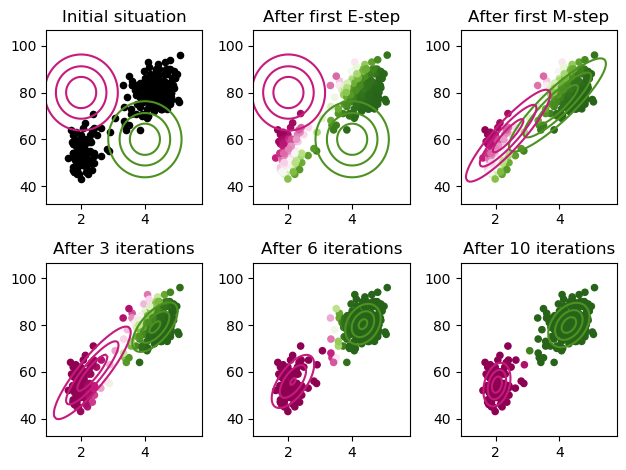

Activating environment at `~/Documents/biaslab/repos/BMLIP/lessons/notebooks/probprog/workspace/Project.toml`


In [14]:
using Pkg; Pkg.activate("probprog/workspace");Pkg.instantiate()

using DataFrames, CSV, LinearAlgebra
include("scripts/gmm_plot.jl") # Holds plotting function 
old_faithful = CSV.read("datasets/old_faithful.csv");

X =  Array(Matrix{Float64}(old_faithful)')
N = size(X, 2)

# Initialize the GMM. We assume 2 clusters.
clusters = [MvNormal([4.;60.], [.5 0;0 10^2]); 
            MvNormal([2.;80.], [.5 0;0 10^2])];
π_hat = [0.5; 0.5]                    # Mixing weights
γ = fill!(Matrix{Float64}(undef,2,N), NaN)  # Responsibilities (row per cluster)

# Define functions for updating the parameters and responsibilities
function updateResponsibilities!(X, clusters, π_hat, γ)
    # Expectation step: update γ
    norm = [pdf(clusters[1], X) pdf(clusters[2], X)] * π_hat
    γ[1,:] = (π_hat[1] * pdf(clusters[1],X) ./ norm)'
    γ[2,:] = 1 .- γ[1,:]
end
function updateParameters!(X, clusters, π_hat, γ)
    # Maximization step: update π_hat and clusters using ML estimation
    m = sum(γ, dims=2)
    π_hat = m / N
    μ_hat = (X * γ') ./ m'
    for k=1:2
        Z = (X .- μ_hat[:,k])
        Σ_k = Symmetric(((Z .* (γ[k,:])') * Z') / m[k])
        clusters[k] = MvNormal(μ_hat[:,k], convert(Matrix, Σ_k))
    end
end

# Execute the algorithm: iteratively update parameters and responsibilities
subplot(2,3,1); plotGMM(X, clusters, γ); title("Initial situation")
updateResponsibilities!(X, clusters, π_hat, γ)
subplot(2,3,2); plotGMM(X, clusters, γ); title("After first E-step")
updateParameters!(X, clusters, π_hat, γ)
subplot(2,3,3); plotGMM(X, clusters, γ); title("After first M-step")
iter_counter = 1
for i=1:3
    for j=1:i+1
        updateResponsibilities!(X, clusters, π_hat, γ)
        updateParameters!(X, clusters, π_hat, γ)
        iter_counter += 1
    end
    subplot(2,3,3+i); 
    plotGMM(X, clusters, γ); 
    title("After $(iter_counter) iterations")
end
PyPlot.tight_layout()

Note that you can step through the interactive demo yourself by running [this script](https://github.com/bertdv/AIP-5SSB0/blob/master/lessons/notebooks/scripts/interactive_em_demo.jl) in julia. You can run a script in julia by    
`julia> include("path/to/script-name.jl")`

###  Summary

- Latent variable models (LVM) contain a set of unobserved variables whose size grows with the number of observations.

- LVMs can model more complex phenomena than fully observed models, but inference in LVM models is usually not analytically solvable.

- The Free Energy (FE) functional transforms Bayesian inference computations (very large summations or integrals) to an optimization problem. 

- Inference by minimizing FE, also known as variational inference, is fully consistent with the "Method of Maximum Relative Entropy", which is by design the rational way to update beliefs from priors to posteriors when new information becomes available. Thus, FE mimimization is a "correct" inference procedure that generalizes Bayes rule. 

- In general, global FE minimization is an unsolved problem and finding good local minima is at the heart of current Bayesian technology research. Three simplifying constraints on the posterior $q(z)$ in the FE functional are currently popular in practical settings:
    - mean-field assumptions
    - assuming a parameterized PDF for $q$
    - EM algorithm
 

   
- These constraints often makes FE minimization implementable at the price of obtaining approximately Bayesian inference results. 

In [6]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->